# **Dependancies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/btc_data')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import *
from keras.callbacks import *
import os
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from commons import mean_absolute_percentage_error
from keras.layers import *
from sklearn.pipeline import Pipeline

# **Loading Data and Data Visualization**

In [ ]:
import pandas as pd

# Đường dẫn đến file btc_data.csv
file_path = '/content/drive/My Drive/Colab Notebooks/btc_data/BTC_Data_2014-2022.csv'

# Đọc file CSV
data = pd.read_csv(file_path)





# Hiển thị 5 dòng đầu tiên
print(data.head(50))


          Date  priceUSD      size  sentbyaddress  transactions  \
0   2014/04/09   447.110  243742.0         122401         64992   
1   2014/04/10   407.703  254334.0         124298         67872   
2   2014/04/11   403.328  223656.0         117926         65563   
3   2014/04/12   425.310  169964.0          87828         47579   
4   2014/04/13   415.876  162260.0          94828         50981   
5   2014/04/14   445.898  216048.0         127969         70026   
6   2014/04/15   487.666  241539.0         123107         72627   
7   2014/04/16   517.354  270984.0         114312         68435   
8   2014/04/17   505.461  223631.0         102596         65021   
9   2014/04/18   485.296  205478.0         100633         56836   
10  2014/04/19   490.961  193237.0          93159         53356   
11  2014/04/20   501.271  169511.0          88713         48865   
12  2014/04/21   498.970  190616.0          93895         57939   
13  2014/04/22   491.704  288040.0         125522         7788

In [ ]:
# Chỉ sử dụng dữ liệu sau 90 ngày
data = data.iloc[89:]  # Bỏ đi các hàng đầu tiên có NaN


In [ ]:
data.head(100)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,...,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,MA_30,MA_60,MA_90
89,2014/07/07,626.639,254198.0,117302,64536,19.359,259716987.0,0.1090,0.0627,9.600,...,4643.0,93.704,22248,8.615,0.299,186344,19.325,610.295667,571.864983,533.517711
90,2014/07/08,621.123,285312.0,136433,69967,18.424,200330013.0,0.1090,0.0621,9.600,...,3248.0,87.178,24425,8.016,0.327,214423,19.308,609.236967,574.819183,535.451189
91,2014/07/09,621.434,256506.0,122923,68352,19.194,251215935.0,0.1060,0.0621,8.675,...,4173.0,89.888,24542,7.314,0.282,184913,19.289,608.344933,577.683650,537.825978
92,2014/07/10,616.557,253741.0,119374,64456,17.967,278516190.0,0.1070,0.0617,9.664,...,4869.0,109.857,23242,8.067,0.300,171317,19.286,607.204600,580.583850,540.195189
93,2014/07/11,622.121,233392.0,115912,58921,18.387,228203200.0,0.1150,0.0622,9.231,...,4395.0,129.459,20939,7.746,0.279,170691,19.281,606.525167,583.650383,542.381978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2014/10/10,362.280,285337.0,146931,80903,5.194,272361697.0,0.0582,0.0362,9.290,...,4433.0,105.543,19090,8.064,0.335,170684,20.117,402.094133,450.233217,500.172489
185,2014/10/11,359.388,248806.0,119838,64876,4.774,176827658.0,0.0575,0.0359,10.000,...,3177.0,88.901,17107,7.717,0.288,146972,20.205,398.221067,446.752083,497.169422
186,2014/10/12,362.544,286125.0,141427,63361,5.362,136730550.0,0.0630,0.0363,9.730,...,2685.0,74.164,17072,7.268,0.298,220350,20.232,394.561800,443.610183,494.288800
187,2014/10/13,378.689,296306.0,153138,77787,5.629,241925769.0,0.0638,0.0379,9.290,...,3771.0,97.407,22018,8.030,0.338,182882,20.139,391.336733,441.271833,491.595778


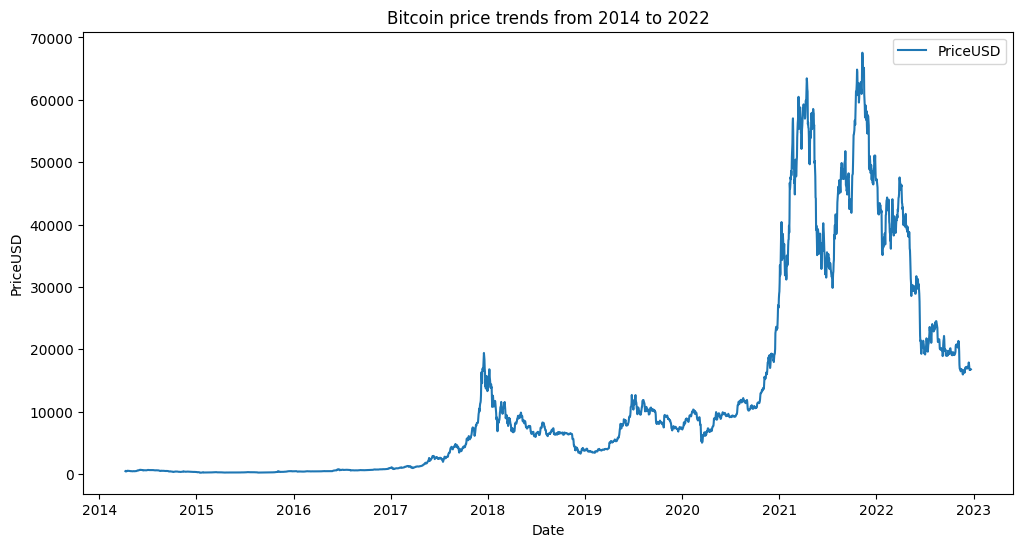

In [ ]:
df = data.copy()
# Chuyển đổi cột Date thành định dạng datetime (nếu chưa làm)
df['Date'] = pd.to_datetime(df['Date'])

# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="priceUSD", label="PriceUSD")
plt.title("Bitcoin price trends from 2014 to 2022")
plt.xlabel("Date")
plt.ylabel("PriceUSD")
plt.legend()
plt.show()


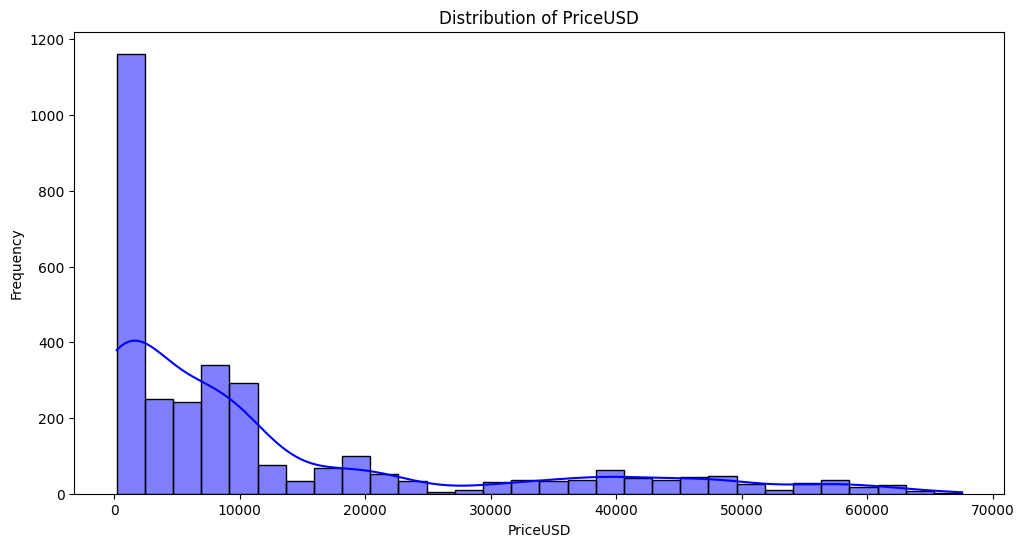

In [ ]:
import seaborn as sns
df = data.copy()
# Biểu đồ phân phối của priceUSD
plt.figure(figsize=(12, 6))
sns.histplot(df['priceUSD'], kde=True, bins=30, color="blue")
plt.title("Distribution of PriceUSD")
plt.xlabel("PriceUSD")
plt.ylabel("Frequency")
plt.show()


Các đặc trưng có mối tương quan với priceUSD:
priceUSD                  1.000000
marketcap                 0.999778
transactionvalue          0.822821
tweets                    0.783683
Date                      0.749336
activeaddresses           0.665413
google_trends             0.646512
sentinusd                 0.624431
sentbyaddress             0.589577
mediantransactionvalue    0.480928
transactionfees           0.460870
median_transaction_fee    0.376900
transactions              0.312164
size                      0.147141
fee_to_reward             0.120889
confirmationtime          0.102327
mining_profitability     -0.237205
top100cap                -0.596287
Name: priceUSD, dtype: float64


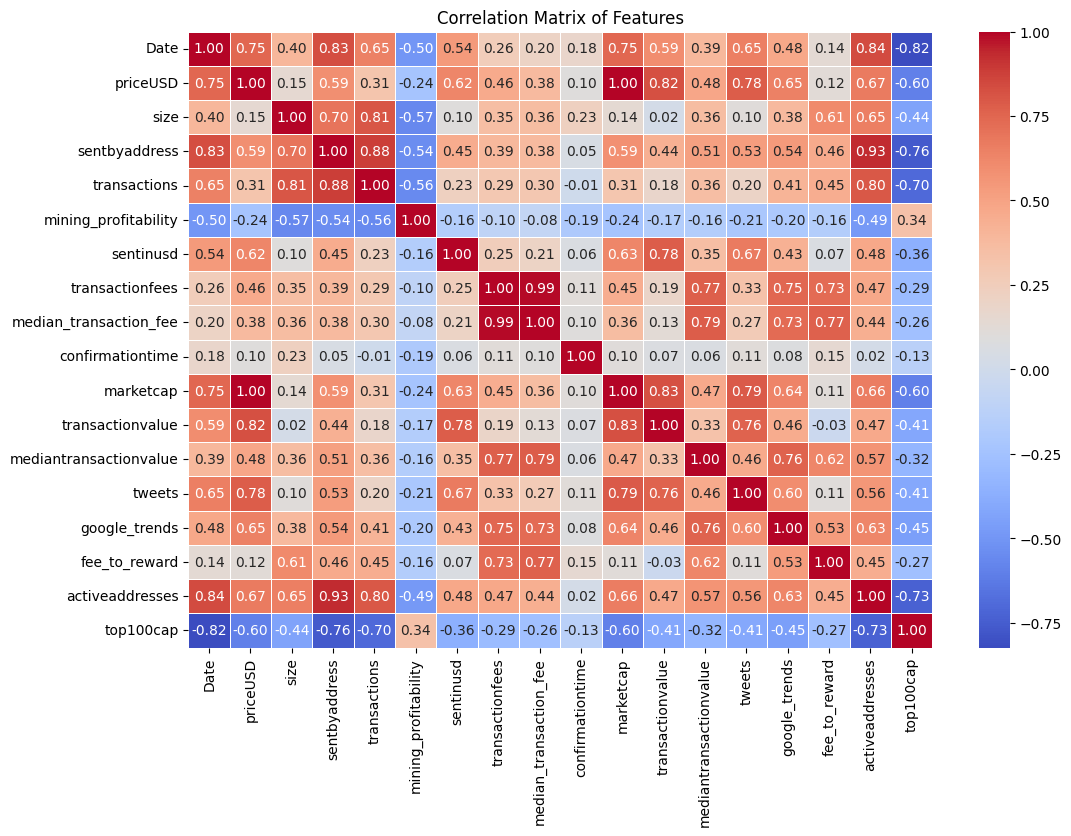

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử 'data' là DataFrame chứa dữ liệu
df = data.copy()

# Chuyển đổi cột 'Date' thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# Tính toán ma trận tương quan
corr = df.corr()

# Lọc mối tương quan với 'priceUSD'
correlation_with_price = corr['priceUSD'].sort_values(ascending=False)

# Hiển thị các đặc trưng có mối tương quan với 'priceUSD'
print("Các đặc trưng có mối tương quan với priceUSD:")
print(correlation_with_price)

# Chọn các đặc trưng có mối tương quan tuyệt đối lớn hơn 0.5
#selected_features = correlation_with_price[correlation_with_price.abs() > 0.5]

# Hiển thị các đặc trưng được chọn
#print("Các đặc trưng được chọn có mối tương quan cao với priceUSD:")
#print(selected_features)

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


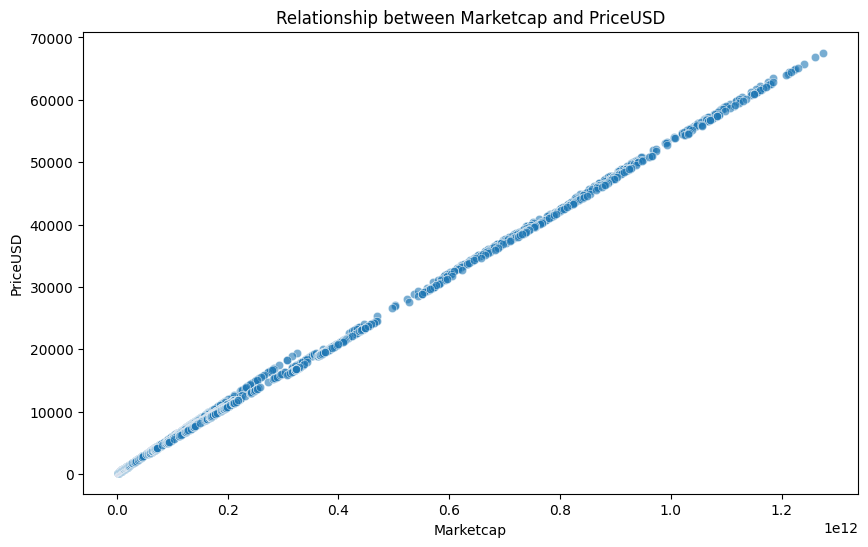

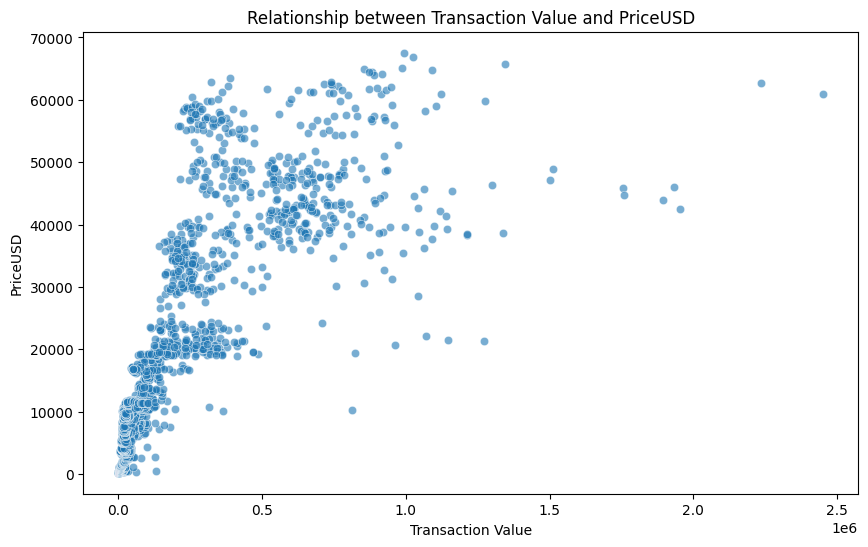

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data.copy()
# Scatter plot giữa priceUSD và marketcap
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="marketcap", y="priceUSD", alpha=0.6)
plt.title("Relationship between Marketcap and PriceUSD")
plt.xlabel("Marketcap")
plt.ylabel("PriceUSD")
plt.show()

# Scatter plot giữa priceUSD và transactionvalue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="transactionvalue", y="priceUSD", alpha=0.6)
plt.title("Relationship between Transaction Value and PriceUSD")
plt.xlabel("Transaction Value")
plt.ylabel("PriceUSD")
plt.show()
